# AirBnB Project for  **Project: Write A Data Science Blog Post**

### 0.1  Key Steps for Project

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.
   I chose the AirBnnB dataset.  Because why not..

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
        Gather necessary data to answer your questions
        Handle categorical and missing data
        Provide insight into the methods you chose and why you chose them

    Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

    Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

## 0.2 [Rubric](https://review.udacity.com/#!/rubrics/1507/view)

#### Code Functionality and Readability
* Code is readable (uses good coding practices - PEP8) 
* Code is functional.
* Write code that is well documented and uses functions and classes as necessary.

#### Data
* Project follows the CRISP-DM Process while analyzing their data. 
* Proper handling of categorical and missing values in the dataset. 
* Categorical variables are handled appropriately for machine learning models (if models are created). 

#### Analysis, Modeling, Visualization
* There are 3-5 business questions answered.
	
#### Github Repository
* Student must publish their code in a public Github repository.  (CHECK)
	
#### Blog Post
* Communicate their findings with stakeholders.
* There should be an intriguing title and image related to the project.
* The body of the post has paragraphs that are broken up by appropriate white space and images.
* Each question has a clearly communicated solution.

##  0.3  CRISP-DM
### 0.3.1 Business Understanding/Data Understanding
          AirBnB is an online marketplace for vacation/temporary houseing rentals.  Thier members/hosts own the property and rent via the  AirBnB marketplace.
          
          The data provides was provided each from Seattle and Bostom
          * listing.csv
          * calendar.csv
          * reviews.csv
          
          How to best position your property to make the most revenue?
          1) What time of year is best to make your property availible to get the most money?
              Summer months for most properties, but there seem to bes some very high outliers around the holidays...
          2) Know your capacity?   What neighborhoods/property type/property attributes sell better?
   
          3) What do you need in your profile to garuntee your property is reviewed and reviewed high
          
          
### 0.3.2 Data Preparation
        1) Imported listing and calendar
        #clean_cal() and clean_listing()
        2) Corrected and adjusted datatypes  
        3) Took some columns and made them into booleans (presnence or absence of awnser)
        
        
     
#### 0.3.2.1 Cleaning Data
        Price is our response variable
        1) removed all rows where price was NA
        2) Removed a column that was mostly NAs
        3) removed a few rows of the remaining NA
        
        
### 0.3.3 Modeling
### 0.3.4 Evaluation
### 0.3.5 Deployment

## 1.1 Header

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path as op

#stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import ast
import math
import os
from datetime import date

#Graphing
import seaborn as sns
import matplotlib.pyplot as plt
import helper as h

#Data modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import pca

In [2]:
PATH = os.getcwd()+"\All Data"
PATH

'C:\\Users\\tcanty\\Documents\\Udacity\\DSND_Term2\\project_files\\AirBnB\\All Data'

In [3]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'b_calendar.csv',
 'b_listings.csv',
 'b_reviews.csv',
 's_calendar.csv',
 's_listings.csv',
 's_reviews.csv']

In [4]:
def clean_listings(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes percentage & currency strings to float
    2) Fixes datatype of oject to categories were appropraite
    3) Fixes bool strings to bool cols
    2) Fixes Datetime cols -> datetime format
    3) There are two columns that have list containing strings, convert to one hot encoded columns 
    4) 
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''

    ## Clean percentage strings to float values
    pct_col = ['host_acceptance_rate','host_response_rate']
    for pc in pct_col:
        df[pc] = df[pc].str.strip("%")
        df[pc] = df[pc].astype('float')
        df[pc] = df[pc].apply(lambda x: x/100)
        #df[pc] = df[pc].map('{:,.2%}'.format)
        
    ## Clean dollar strings to value

    dol_col = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        #df[dol] = df[dol].map('${:,.2f}'.format)
        
    ## Change type to category
    cat_col = ['host_response_time','host_location','host_neighbourhood','neighbourhood',
               'neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode',
              'market','smart_location','country_code','country','property_type','room_type',
              'calendar_updated','jurisdiction_names','cancellation_policy','bed_type']
    
    for cc in cat_col:
        df[cc] = df[cc].astype('category')
  

    ## Fix Boolean Columns
    bool_col = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                'is_location_exact','has_availability','requires_license','instant_bookable',
               'require_guest_profile_picture','require_guest_phone_verification']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    ## Fix Datetime columns
    dt_col = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

    ## Fix list column
    ## The following code transforms column 'host_verification' to a usable matrix of 
    ##     one hot encoding the contained communicaiton methods      
    
    df2 = pd.DataFrame(df['host_verifications'].apply(lambda x:ast.literal_eval(x)))  # string to list #
    df3 = df2.host_verifications.apply(pd.Series)                                   # list -> series across columns #
    df2 = df2.merge(df3, right_index=True, left_index=True)
    df2 = df2.reset_index().melt(id_vars=['id','host_verifications'],value_name = 'host_sm_ver')
    df2 = df2.pivot_table(values='variable',columns='host_sm_ver',index='id',aggfunc='count',fill_value=0)
    df2 = df2.add_prefix('hv::')
    df = df.merge(df2,left_index=True, right_index=True)

    
    
    df4 = pd.DataFrame(df_listing['amenities'].apply(lambda x:
                           x.replace('\"','').replace('{','').replace('}','').split(',')))
    df5 = df4.iloc[:,0].apply(pd.Series)
    df4 = df4.merge(df5,left_index=True,right_index=True)
    df4 = df4.reset_index().melt(id_vars=['id','amenities'],value_name = 'amms')
    df4 = df4.pivot_table(values='variable',columns='amms',index='id',aggfunc='count',fill_value=0)
    df4 = df4.add_prefix('amm::')
    df = df.merge(df4,left_index=True, right_index=True)
    
    ## Remaining string columns, only interested in the presence or absence.   Replace with boolean. 
    
    
    str_cols = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
   'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about']
    
    def replace_str(x):
        if type(x) == float:
            if  math.isnan(x):
                return False
        else: return True
    
    df_listed_attributes = pd.DataFrame()
    for col in str_cols:
        df_listed_attributes[col] = df[col].apply(lambda x: replace_str(x))
        df_listed_attributes[col] = df_listed_attributes[col].astype('bool')
    
    df_listed_attributes = df_listed_attributes.add_prefix('attrib::')
    df = df.merge(df_listed_attributes,left_index=True,right_index=True)
    df = df.drop(columns=str_cols)
    
    
    ## Drop Columns
    '''Reasons
    All N/A: licence
    No N/A: listing_url
    onehot: host_verifications
    am
       
    '''
    drop_cols = ['license','host_verifications','amenities']  
    df = df.drop(columns=drop_cols)
    return df


In [5]:
def clean_cal(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes Datetime cols -> datetime format
    2) Fixes percentage strings to float
    3) Fixes bool strings to bool cols
    4) Fixes datatype of oject to categories were appropraite
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''
    dol_col= ['price']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        
    ## Fix Datetime columns
    dt_col = ['date']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

        
    ## Expand Datetime
    df['week_num'] = df['date'].apply(lambda x: date.isocalendar(x)[1])
    df['month'] = df['date'].apply(lambda x: x.month)
    df['year'] = df['date'].apply(lambda x: x.year)
    
    ## Fix Bool Columns

    bool_col = ['available']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    
    
    
    return df

In [6]:
df_listing = pd.read_csv(PATH+'\s_listings.csv',index_col=0)

In [7]:
df_cal = pd.read_csv(PATH+'\s_calendar.csv',index_col=0)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
df_listing = clean_listings(df_listing)

In [9]:
df_cal = clean_cal(df_cal)

### Q1.What time of year is best to make your property availible to get the most money?

In [10]:
sns.set_style('darkgrid')

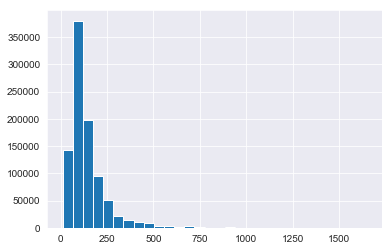

In [11]:
df_cal['price'].hist(bins=30,)

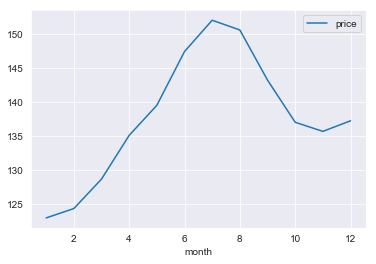

In [12]:
pd.DataFrame(df_cal.groupby(['month'])['price'].mean()).plot()

import matplotlib.pyplot as plt

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


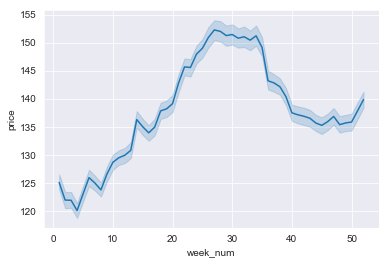

In [13]:
ax1 = sns.lineplot(x=df_cal['week_num'],y=df_cal['price'])

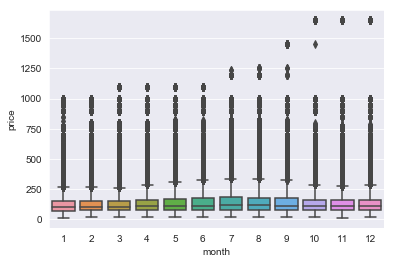

In [14]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],)

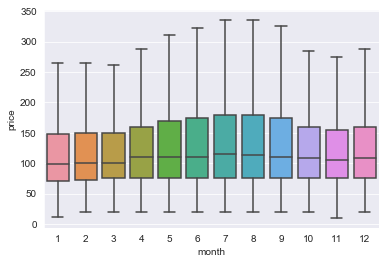

In [15]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],showfliers=False)

In [16]:
mod = ols('price ~ month',data=df_cal).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq        df            F  PR(>F)
month     1.808500e+07       1.0  1641.275915     0.0
Residual  1.029757e+10  934540.0          NaN     NaN


In [17]:
df_cal2=0

In [18]:
#Create a boxplot
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_cal2 = df_cal
df_cal2['month'] = df_cal2['month'].apply(lambda x: month[x])

[Text(0, 0.5, 'price ($/night)'), Text(0.5, 0, '')]

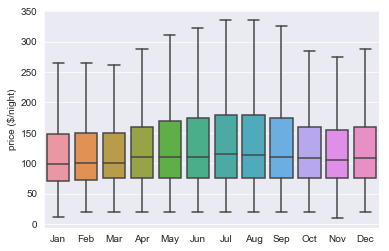

In [19]:
fig_month = sns.boxplot(y=df_cal2['price'],x=df_cal2['month'],showfliers=False)
fig_month.set(xlabel = '',ylabel='price ($/night)')

In [122]:
df_cal2.groupby(by='month')['price'].median().sort_values(ascending=False)

month
Jul    115.0
Aug    114.0
Sep    110.0
May    110.0
Jun    110.0
Apr    110.0
Oct    109.0
Dec    109.0
Nov    106.0
Mar    100.0
Feb    100.0
Jan     99.0
Name: price, dtype: float64

## END OF QUESTION 1

Question 2:  Know your capacity?   Waht neighborhoods/property type/property attributes sell better?

In [20]:
def compile_and_clean_attr_data(df_list,df_cal):
    
    #Using the average list prices in df_cal['price'] vs the current listing price df_list['price']
    df_avg_price = pd.DataFrame(df_cal.groupby(by=['listing_id'])['price'].mean())
    df_list = df_list.drop(columns='price')
    
    
    df = df_avg_price.merge(df_list,left_index=True,right_index=True)
    
    #Strip Xs down to the property/physical attributes of the property
    ammenities = list(df.filter(like='amm').columns.values)
    physical_attr_loc = ['price','bathrooms','bedrooms','beds','neighbourhood_cleansed',
                     'neighbourhood_group_cleansed','property_type','room_type','bed_type',
                    'accommodates','guests_included'] + ammenities
    
    df = df[physical_attr_loc]
    ##Clean Nas 
    
    # Drop all rows without a y (price)
    df = df.dropna(axis=0,subset=['price'])
    
    # Dropping rows b/c The following had a low number of n/a rows and would be difficult to impute, 
    df = df.drop(index=df.loc[df['bedrooms'].isna(),:].index )
    df = df.drop(index=df.loc[df['property_type'].isna(),:].index )
    df = df.drop(index=df.loc[df['bathrooms'].isna(),:].index )
    
    
    #Creating a log-transformed price column to 
    df.insert(column='price_log',loc=1,value=np.nan)
    df['price_log'] = df['price'].apply(lambda x: np.log(x))
    
    # One hot encode the categorical columns
    cat_col = list(df.select_dtypes(include='category').columns.values)
    df = df.merge(pd.get_dummies(df[cat_col],prefix_sep='::'),right_index=True, left_index=True)
    df = df.drop(columns=cat_col)
    
    #Standardize
    std_col = ['price','price_log']
    
    #Normalize
    norm_col = ['accommodates','guests_included','bathrooms','bedrooms','beds']
    
    return df

In [21]:
df_q2 = compile_and_clean_attr_data(df_listing,df_cal)

#### Standardize and Normalize


In [22]:
#Standardize
std_col = ['price','price_log']
blah = StandardScaler()

df_q2[std_col] = blah.fit_transform(df_q2[std_col])

#Normalize
norm_col = ['accommodates','guests_included','bathrooms','bedrooms','beds']

df_q2[norm_col] = normalize(df_q2[norm_col])

#### Linear Model

In [23]:
df_q2_X = df_q2.drop(columns=['price','price_log'])
df_q2_y1 = df_q2['price']
df_q2_y2 = df_q2['price_log']

q2_model = LinearRegression()

q2_log_model = LinearRegression()

q2_X_train, q2_X_test, q2_y1_train, q2_y1_test, q2_y2_train, q2_y2_test = train_test_split(df_q2_X,df_q2_y1,df_q2_y2,test_size = 0.3,random_state=72)

q2_model.fit(q2_X_train,q2_y1_train)

q2_log_model.fit(q2_X_train,q2_y2_train)

q2_y1_predict = q2_model.predict(q2_X_test)

q2_y2_predict = q2_log_model.predict(q2_X_test)

In [24]:
r2_score(q2_y1_test,q2_y1_predict)

-3.475602644236462e+20

In [25]:
r2_score(q2_y2_test,q2_y2_predict)

-3.39906762033953e+19

In [26]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = q2_X_train.columns
coefs_df['coefs'] = q2_model.coef_
coefs_df['abs_coefs'] = np.abs(q2_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df[0:15]

est_int         coefs  \
167                         room_type::Entire home/apt  7.761469e+12   
168                            room_type::Private room  7.761469e+12   
169                             room_type::Shared room  7.761469e+12   
140             neighbourhood_group_cleansed::Downtown -8.310245e+11   
145  neighbourhood_group_cleansed::Other neighborhoods -7.681653e+11   
144            neighbourhood_group_cleansed::Northgate -7.458055e+11   
135          neighbourhood_group_cleansed::Beacon Hill -6.999098e+11   
136         neighbourhood_group_cleansed::Capitol Hill -5.951270e+11   
83                 neighbourhood_cleansed::Lawton Park -5.773004e+11   
53                  neighbourhood_cleansed::Briarcliff -5.773004e+11   
120         neighbourhood_cleansed::Southeast Magnolia -5.773004e+11   
134              neighbourhood_group_cleansed::Ballard -5.685100e+11   
147       neighbourhood_group_cleansed::Rainier Valley -5.312899e+11   
139             neighbourhood_group_cleansed::Delridge -4.520077e+11   
137              neighbourhood_group_cleansed::Cascade -4.187697e+11   

        abs_coefs  
167  7.761469e+12  
168  7.761469e+12  
169  7.761469e+12  
140  8.310245e+11  
145  7.681653e+11  
144  7.458055e+11  
135  6.999098e+11  
136  5.951270e+11  
83   5.773004e+11  
53   5.773004e+11  
120  5.773004e+11  
134  5.685100e+11  
147  5.312899e+11  
139  4.520077e+11  
137  4.187697e+11

In [27]:
coefs_df['type'] = coefs_df['est_int'].apply(lambda x: x.split(':')[0])

In [28]:
coefs_df.groupby(by='type')['abs_coefs'].mean().sort_values(ascending=False).head(6)

type
room_type                       7.761469e+12
neighbourhood_group_cleansed    4.691246e+11
property_type                   3.549125e+11
neighbourhood_cleansed          1.909817e+11
bed_type                        7.675993e+09
bathrooms                       1.697473e+00
Name: abs_coefs, dtype: float64

In [29]:
df_q2 = df_q2.drop(columns='price_log')

In [30]:
df_q2_corr = df_q2.corr().sort_values(by='price',ascending=False)

df_q2_corr = df_q2_corr[['price']]

df_q2_corr.insert(loc=0,column='type',value=df_q2_corr.index)

df_q2_corr.loc[:,'type'] = df_q2_corr['type'].apply(lambda x: x.split(':')[0])

list(df_q2_corr.head(8).index)

['price',
 'room_type::Entire home/apt',
 'amm::Family/Kid Friendly',
 'amm::Cable TV',
 'accommodates',
 'amm::TV',
 'amm::Air Conditioning',
 'amm::Gym']

In [31]:
df_q2_corr = df_q2.corr().sort_values(by='price',ascending=False)

df_q2_corr = df_q2_corr[list(df_q2_corr.head(12).index)]

df_q2_corr.insert(loc=0,column='type',value=df_q2_corr.index)

df_q2_corr.loc[:,'type'] = df_q2_corr['type'].apply(lambda x: x.split(':')[0])

df_q2_abrv = df_q2_corr.sort_values(by='price',ascending=False).head(12)
df_q2_abrv.drop(columns='type')
df_q2_abrv[['price']]

price
price                                   1.000000
room_type::Entire home/apt              0.451405
amm::Family/Kid Friendly                0.278299
amm::Cable TV                           0.277180
accommodates                            0.231935
amm::TV                                 0.229050
amm::Air Conditioning                   0.174315
amm::Gym                                0.173506
neighbourhood_group_cleansed::Downtown  0.172772
amm::Hot Tub                            0.167602
amm::Pool                               0.160331
amm::Dryer                              0.144367

In [32]:
df_q2_abrv

type  \
price                                                          price   
room_type::Entire home/apt                                 room_type   
amm::Family/Kid Friendly                                         amm   
amm::Cable TV                                                    amm   
accommodates                                            accommodates   
amm::TV                                                          amm   
amm::Air Conditioning                                            amm   
amm::Gym                                                         amm   
neighbourhood_group_cleansed::Downtown  neighbourhood_group_cleansed   
amm::Hot Tub                                                     amm   
amm::Pool                                                        amm   
amm::Dryer                                                       amm   

                                           price  room_type::Entire home/apt  \
price                                   1.000000                    0.451405   
room_type::Entire home/apt              0.451405                    1.000000   
amm::Family/Kid Friendly                0.278299                    0.249497   
amm::Cable TV                           0.277180                    0.209171   
accommodates                            0.231935                    0.421489   
amm::TV                                 0.229050                    0.249720   
amm::Air Conditioning                   0.174315                    0.080692   
amm::Gym                                0.173506                    0.127751   
neighbourhood_group_cleansed::Downtown  0.172772                    0.187848   
amm::Hot Tub                            0.167602                    0.037128   
amm::Pool                               0.160331                    0.077048   
amm::Dryer                              0.144367                    0.056012   

                                        amm::Family/Kid Friendly  \
price                                                   0.278299   
room_type::Entire home/apt                              0.249497   
amm::Family/Kid Friendly                                1.000000   
amm::Cable TV                                           0.169711   
accommodates                                            0.248178   
amm::TV                                                 0.164675   
amm::Air Conditioning                                   0.079589   
amm::Gym                                                0.103359   
neighbourhood_group_cleansed::Downtown                  0.051904   
amm::Hot Tub                                            0.119460   
amm::Pool                                               0.096989   
amm::Dryer                                              0.156655   

                                        amm::Cable TV  accommodates   amm::TV  \
price                                        0.277180      0.231935  0.229050   
room_type::Entire home/apt                   0.209171      0.421489  0.249720   
amm::Family/Kid Friendly                     0.169711      0.248178  0.164675   
amm::Cable TV                                1.000000      0.150046  0.347501   
accommodates                                 0.150046      1.000000  0.179918   
amm::TV                                      0.347501      0.179918  1.000000   
amm::Air Conditioning                        0.158042      0.087056  0.155065   
amm::Gym                                     0.108371      0.131963  0.117572   
neighbourhood_group_cleansed::Downtown       0.090809      0.168014  0.112009   
amm::Hot Tub                                 0.128834      0.078288  0.033880   
amm::Pool                                    0.154567      0.127398  0.049092   
amm::Dryer                                   0.117772      0.023900  0.168774   

                                        amm::Air Conditioning  amm::Gym  \
price                                                0.174315  0.173506 

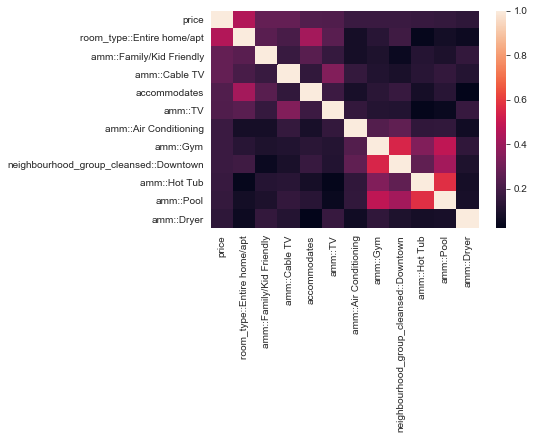

In [33]:
sns.heatmap(df_q2_abrv.drop(columns='type'))

In [34]:
df_room_type= df_cal.merge(df_listing[['room_type']],left_index=True,right_index=True)

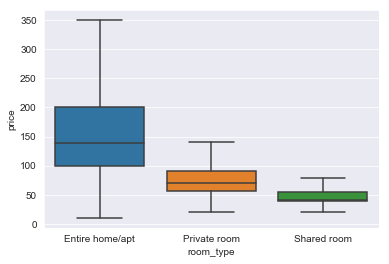

In [35]:
sns.boxplot(x=df_room_type['room_type'],y=df_room_type['price'],showfliers=False)

In [36]:
df_room_type.groupby(by='room_type')['price'].median()

room_type
Entire home/apt    139.0
Private room        70.0
Shared room         40.0
Name: price, dtype: float64

In [37]:
df_room_type.insert(loc=7,column='home/apt',value=False)

In [38]:
df_room_type.loc[:,'home/apt'] = df_room_type['room_type'].apply(lambda x: True if x == 'Entire home/apt' else False)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


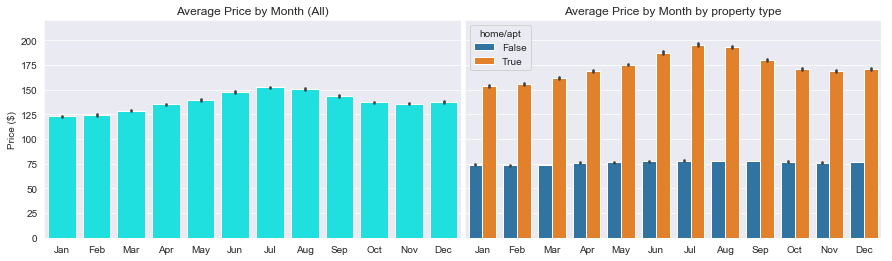

In [39]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_room_type['month'],y=df_room_type['price'],hue=df_room_type['home/apt'],ax=ax[1])
sns.barplot(x=df_room_type['month'],y=df_room_type['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month by property type')
ax[0].set_title('Average Price by Month (All)')
f.show()

In [40]:
df_amm = df_cal.merge(df_listing.filter(like='amm'),left_index=True,right_index=True)

[Text(0, 0.5, 'price ($/night)'), Text(0.5, 0, '')]

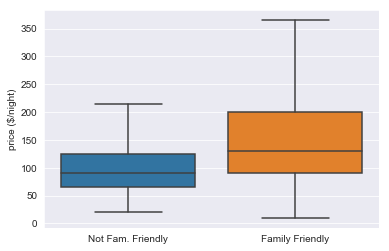

In [41]:
fig_fam = sns.boxplot(x=df_amm['amm::Family/Kid Friendly'],y=df_room_type['price'],showfliers=False)
fig_fam.set_xticklabels(labels = ['Not Fam. Friendly','Family Friendly'])
fig_fam.set(xlabel = '',ylabel='price ($/night)')

In [42]:
df_amm.groupby('amm::Family/Kid Friendly')[['price','amm::Family/Kid Friendly']].median()

price  amm::Family/Kid Friendly
amm::Family/Kid Friendly                                 
0                          90.0                         0
1                         130.0                         1

In [43]:
df_amm.groupby(by='amm::Family/Kid Friendly').median()

available  price  week_num  year  amm::  \
amm::Family/Kid Friendly                                            
0                              True   90.0        26  2016      0   
1                              True  130.0        26  2016      0   

                          amm::24-Hour Check-in  amm::Air Conditioning  \
amm::Family/Kid Friendly                                                 
0                                             0                      0   
1                                             0                      0   

                          amm::Breakfast  amm::Buzzer/Wireless Intercom  \
amm::Family/Kid Friendly                                                  
0                                      0                              0   
1                                      0                              0   

                          amm::Cable TV           ...            \
amm::Family/Kid Friendly                          ...             
0                                     0           ...             
1                                     0           ...             

                          amm::Safety Card  amm::Shampoo  amm::Smoke Detector  \
amm::Family/Kid Friendly                                                        
0                                        0             1                    1   
1                                        0             1                    1   

                          amm::Smoking Allowed  amm::Suitable for Events  \
amm::Family/Kid Friendly                                                   
0                                            0                         0   
1                                            0                         0   

                          amm::TV  amm::Washer  amm::Washer / Dryer  \
amm::Family/Kid Friendly                                              
0                               1            1                    0   
1                               1            1                    0   

                          amm::Wheelchair Accessible  amm::Wireless Internet  
amm::Family/Kid Friendly                                                      
0                                                  0                       1  
1                                                  0                       1  

[2 rows x 45 columns]

In [44]:
df_amm_kid = df_cal.merge(df_listing[['amm::Family/Kid Friendly']],left_index=True,right_index=True)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


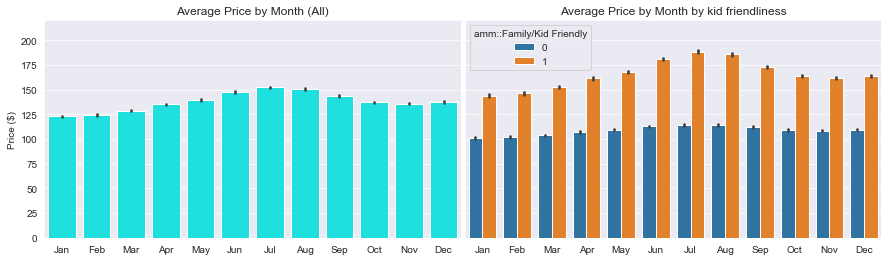

In [45]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_amm_kid['month'],y=df_amm_kid['price'],hue=df_amm_kid['amm::Family/Kid Friendly'],ax=ax[1])
sns.barplot(x=df_amm_kid['month'],y=df_amm_kid['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month by kid friendliness')
ax[0].set_title('Average Price by Month (All)')
f.show()

[Text(0, 0.5, 'price ($/night)'), Text(0.5, 0, '')]

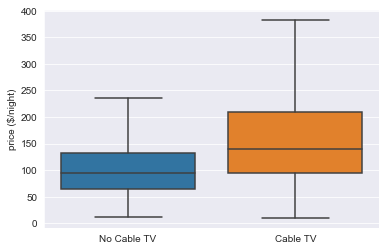

In [46]:
fig_cable = sns.boxplot(x=df_amm['amm::Cable TV'],y=df_room_type['price'],showfliers=False)
fig_cable.set_xticklabels(labels = ['No Cable TV','Cable TV'])
fig_cable.set(xlabel = '',ylabel='price ($/night)')

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


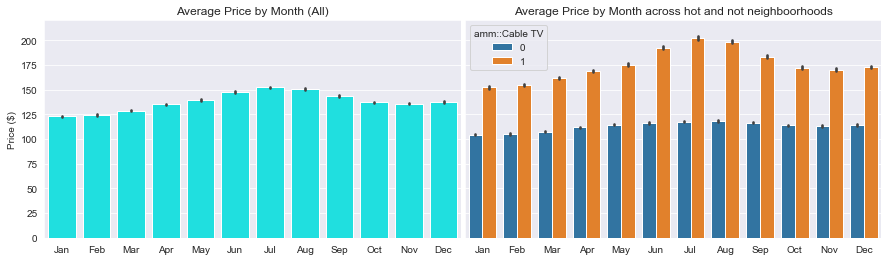

In [47]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_amm['month'],y=df_amm['price'],hue=df_amm['amm::Cable TV'],ax=ax[1])
sns.barplot(x=df_amm['month'],y=df_amm['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month across hot and not neighboorhoods')
ax[0].set_title('Average Price by Month (All)')
f.show()

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


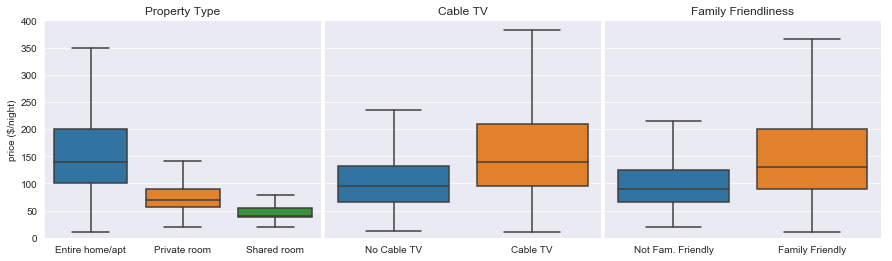

In [48]:
f,ax = plt.subplots(1,3,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.boxplot(x=df_room_type['room_type'],y=df_room_type['price'],showfliers=False,ax=ax[0])
sns.boxplot(x=df_amm['amm::Cable TV'],y=df_room_type['price'],showfliers=False,ax=ax[1])
sns.boxplot(x=df_amm['amm::Family/Kid Friendly'],y=df_room_type['price'],showfliers=False,ax=ax[2])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 400))
ax[0].set(ylim=(0, 400))
ax[2].set(ylim=(0, 400))

ax[1].set_xticklabels(labels = ['No Cable TV','Cable TV'])
ax[2].set_xticklabels(labels = ['Not Fam. Friendly','Family Friendly'])

ax[0].set_ylabel('price ($/night)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

ax[0].set_title('Property Type')
ax[1].set_title('Cable TV')
ax[2].set_title('Family Friendliness')
f.show()

In [49]:
df_acc = df_cal.merge(df_listing[['accommodates']],left_index=True,right_index=True)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'price ($/night)')

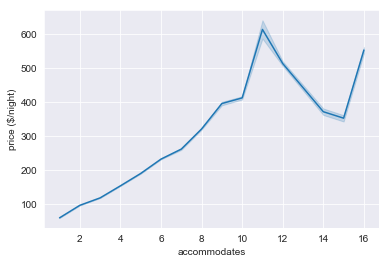

In [50]:
fig_acc = sns.lineplot(x=df_acc['accommodates'],y=df_acc['price'])
fig_acc.set_ylabel('price ($/night)')

In [51]:
df_acc.groupby(by='accommodates').median()

available  price  week_num  year
accommodates                                  
1                  True   50.0        26  2016
2                  True   85.0        26  2016
3                  True  105.0        26  2016
4                  True  135.0        26  2016
5                  True  175.0        26  2016
6                  True  200.0        26  2016
7                  True  240.0        26  2016
8                  True  295.0        26  2016
9                  True  400.0        26  2016
10                 True  350.0        26  2016
11                 True  400.0        26  2016
12                 True  550.0        26  2016
14                 True  399.0        26  2016
15                 True  400.0        26  2016
16                 True  600.0        26  2016

In [52]:
df_acc_sqft = df_acc.merge(df_listing[['square_feet']],right_index=True,left_index=True)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


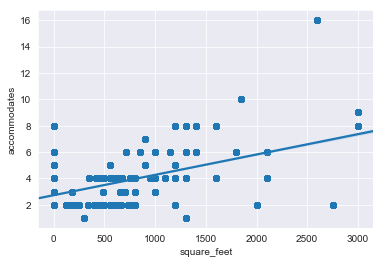

In [53]:
fig_acc.set_ylabel('price ($/night)')
fig_acc_sc = sns.regplot(x=df_acc_sqft['square_feet'],y=df_acc_sqft['accommodates'])

#### COMPARE NEIGHBOORHOODS

In [70]:
hot_neighboorhoods=['Magnolia','Downtown','Queen Anne','West Seattle']

def hotchecks(x,list):
    if x in hot_neighboorhoods:
        return True
    else:
        return False

df_neigh = df_cal.merge(df_listing[['neighbourhood_group_cleansed']],left_index=True,right_index=True)

df_neigh.insert(loc = df_neigh.shape[1],column='hot_neigh',value=False,)

df_neigh['hot_neigh'] = df_neigh['neighbourhood_group_cleansed'].apply(lambda x: hotchecks(x,hot_neighboorhoods))

month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#df_neigh['month'] = df_neigh['month'].apply(lambda x: month[x])

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


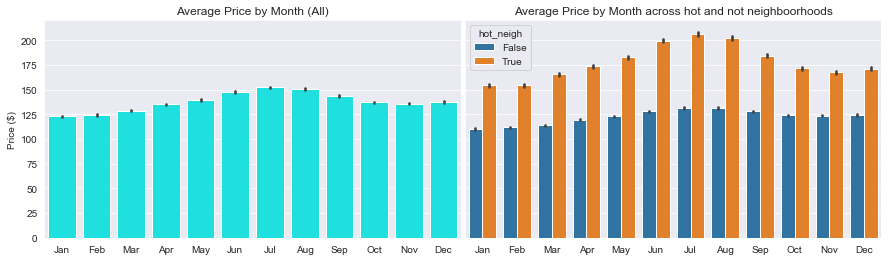

In [71]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],hue=df_neigh['hot_neigh'],ax=ax[1])
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month across hot and not neighboorhoods')
ax[0].set_title('Average Price by Month (All)')
f.show()

In [72]:
neighList = list(df_neigh.groupby(by='neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False).index)

[Text(0, 0.5, 'price ($/night)'), Text(0.5, 0, '')]

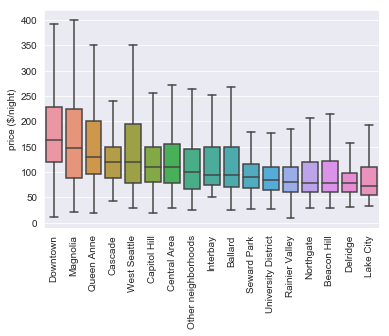

In [73]:
ax_neigh = sns.boxplot(x=df_neigh.neighbourhood_group_cleansed,y=df_neigh.price,showfliers=False,
            order=neighList)
ax_neigh.set_xticklabels(labels = neighList,rotation=90)
ax_neigh.set(xlabel = '',ylabel = 'price ($/night)')

In [74]:
df_neigh.groupby(by='neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False)

neighbourhood_group_cleansed
Downtown               164.0
Magnolia               147.0
Queen Anne             130.0
Cascade                120.0
West Seattle           119.0
Capitol Hill           110.0
Central Area           109.0
Other neighborhoods    100.0
Interbay                95.0
Ballard                 95.0
Seward Park             90.0
University District     85.0
Rainier Valley          80.0
Northgate               79.0
Beacon Hill             79.0
Delridge                78.0
Lake City               72.0
Name: price, dtype: float64

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


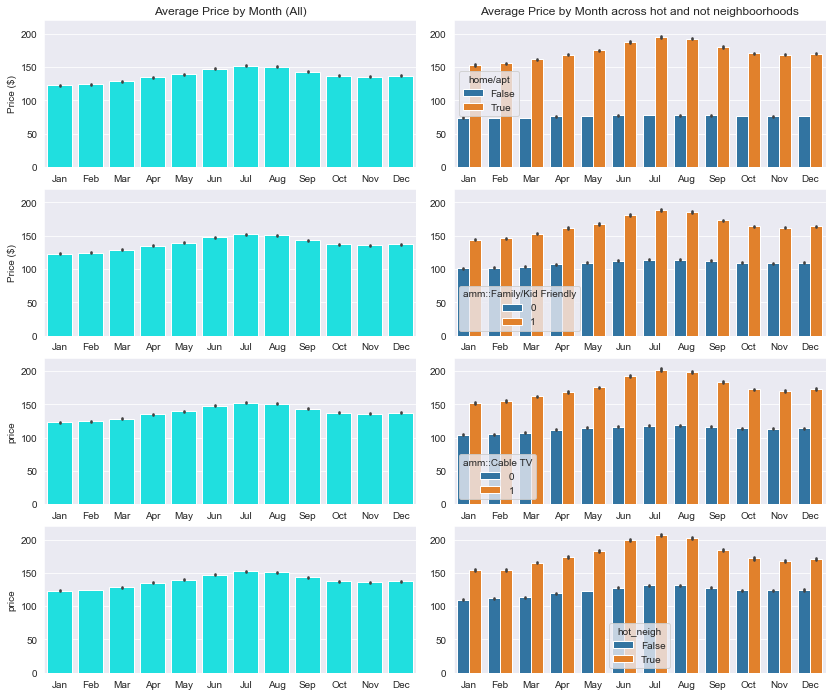

In [128]:
f,ax = plt.subplots(4,2)
f.set_figwidth(14)
f.set_figheight(12)

sns.set_style('darkgrid')
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],color='cyan',ax=ax[0,0])
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],color='cyan',ax=ax[1,0])
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],color='cyan',ax=ax[2,0])
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],color='cyan',ax=ax[3,0])

sns.barplot(x=df_room_type['month'],y=df_room_type['price'],hue=df_room_type['home/apt'],ax=ax[0,1],)
sns.barplot(x=df_amm_kid['month'],y=df_amm_kid['price'],hue=df_amm_kid['amm::Family/Kid Friendly'],ax=ax[1,1])
sns.barplot(x=df_amm['month'],y=df_amm['price'],hue=df_amm['amm::Cable TV'],ax=ax[2,1])
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],hue=df_neigh['hot_neigh'],ax=ax[3,1])

f.subplots_adjust(wspace=0.1, hspace=0.15)


for xx in range(ax.shape[0]):
    for yy in range(ax.shape[1]):
        if yy == 2:
            ax[xx,yy].set_xlabel('Month')
        else:
            ax[xx,yy].set_xlabel('')
        ax[xx,1].set_ylabel('')
        ax[yy,0].set_ylabel('Price ($)')
        ax[xx,yy].set(ylim=(0, 220))
        

ax[0,0].set_title('Price by Month across home/apt vs other properties')
ax[0,1].set_title('Price by Month across Family/Kid friendly vs other properties')
ax[0,2].set_title('Price by Month across Has Cable TV vs other properties')
ax[0,3].set_title('Price by Month across Hot Neigh vs other properties')
ax[0,0].set_title('Average Price by Month (All)')
f.show()

In [126]:
for xx in range(ax.shape[0]):
    for yy in range(ax.shape[1]):
        ax[xx,1].set_ylabel('')
        ax[yy,0].set_ylabel('Price ($)')
        ax[xx,yy].set(ylim=(0, 220))
        if yy == 2:
            ax[xx,yy].set_xlabel('Month')
        else:
            ax[xx,yy].set_xlabel('')
        

In [118]:
ax[0,1].set_title('Average Price by Month across hot and not neighboorhoods')
ax[0,0].set_title('Average Price by Month (All)')
f.show()

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [119]:
f.get_backend()

AttributeError: 'Figure' object has no attribute 'get_backend'

In [130]:
ax[2,0].set_ylabel('Price ($)')
ax[3,0].set_ylabel('Price ($)')
ax[0,1].set_title('Price by Month across home/apt vs other properties')
ax[1,1].set_title('Price by Month across Family/Kid friendly vs other properties')
ax[2,1].set_title('Price by Month across Has Cable TV vs other properties')
ax[3,1].set_title('Price by Month across Hot Neigh vs other properties')

Text(0.5, 1.0, 'Price by Month across Hot Neigh vs other properties')

In [134]:
f.subplots_adjust(wspace=0.1, hspace=0.3)

In [161]:
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()
ax[3,1].legend()

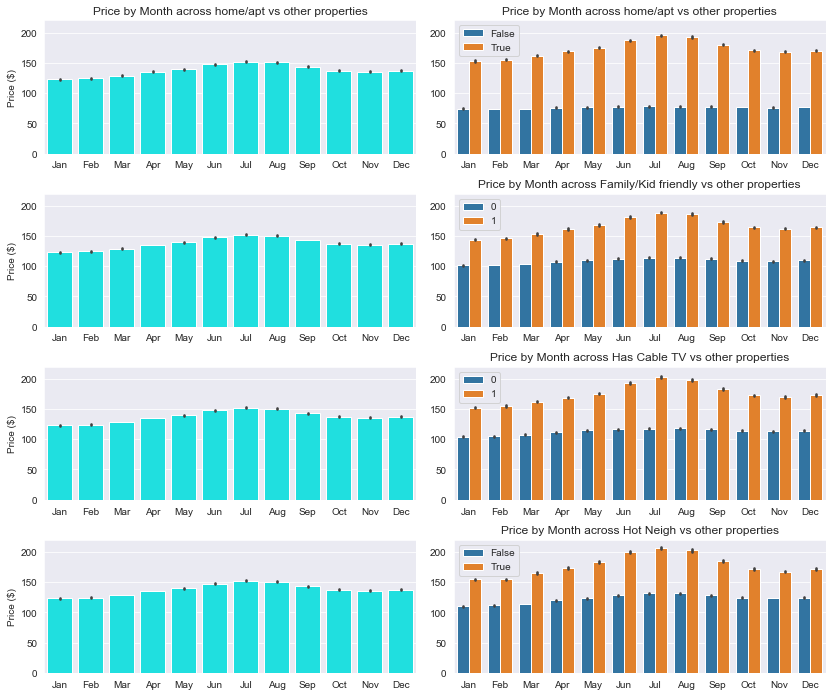

In [162]:
f